# Storing the processed data of listings to a new dataframe to do tasks

In [2]:
import pandas as pd

list_paris_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_listing_dataset/processed_listing_paris.csv')
list_paris_price_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_listing_dataset/processed_listing_paris_price.csv')
list_paris_review_scores_rating_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_listing_dataset/processed_listing_paris_reviewscore.csv')

print(list_paris_df.shape)
print(list_paris_price_df.shape)
print(list_paris_review_scores_rating_df.shape)

/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_27896/3212414696.py:3: DtypeWarning: Columns (0,1,5,12,13,19,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  list_paris_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_listing_dataset/processed_listing_paris.csv')
/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_27896/3212414696.py:4: DtypeWarning: Columns (0,1,5,12,13,19,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  list_paris_price_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_listing_dataset/processed_listing_paris_price.csv')


(95466, 62)
(64233, 62)
(68323, 62)


/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_27896/3212414696.py:5: DtypeWarning: Columns (0,1,5,12,13,19,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  list_paris_review_scores_rating_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_listing_dataset/processed_listing_paris_reviewscore.csv')


In [3]:
print(list_paris_df['price'].info())
print(list_paris_price_df['price'].info())
print(list_paris_review_scores_rating_df['price'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 95466 entries, 0 to 95465
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
64232 non-null  object
dtypes: object(1)
memory usage: 746.0+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 64233 entries, 0 to 64232
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
64230 non-null  object
dtypes: object(1)
memory usage: 501.9+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 68323 entries, 0 to 68322
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
46056 non-null  object
dtypes: object(1)
memory usage: 533.9+ KB
None


In [4]:
# Remove non-numeric characters (e.g., commas, $ signs) from 'price' column
list_paris_price_df['price'] = list_paris_price_df['price'].replace({'\$': '', ',': ''}, regex=True)

# Convert the cleaned price column to float
list_paris_price_df['price'] = pd.to_numeric(list_paris_price_df['price'], errors='coerce')

# Now the column should be converted to float


# Storing the processed data of reviews to a new dataframe to do tasks

In [5]:
reviews_paris_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_review_dataset/processed_review_paris.csv') 
print(reviews_paris_df.shape)

/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_27896/1030548983.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_paris_df = pd.read_csv('/Users/shashwathkumar/Jupiitor notebook/assignment_1/dataset/pre_processed_review_dataset/processed_review_paris.csv')


(2016206, 7)


Task 1:

In [6]:
feature_1 = ['price']
feature_2 = ['minimum_nights','maximum_nights','number_of_reviews']
feature_3 = ['review_scores_rating']

summary_stats_1 = list_paris_price_df[feature_1].describe()
summary_stats_2 = list_paris_df[feature_2].describe()
summary_stats_3 = list_paris_review_scores_rating_df[feature_3].describe()

print(summary_stats_1)

              price
count  64227.000000
mean     256.029380
std      522.283558
min        8.000000
25%      103.000000
50%      155.000000
75%      256.000000
max    30400.000000


In [70]:
print(summary_stats_2)

       minimum_nights  maximum_nights  number_of_reviews
count    95461.000000    9.546100e+04       95460.000000
mean        40.242497    2.308851e+04          20.946309
std        106.171414    6.950587e+06          53.281560
min          0.000000    0.000000e+00           0.000000
25%          2.000000    4.500000e+01           0.000000
50%          3.000000    3.650000e+02           4.000000
75%          5.000000    1.125000e+03          19.000000
max       1000.000000    2.147484e+09        3295.000000


In [8]:
print(summary_stats_3)

       review_scores_rating
count          68319.000000
mean               4.717561
std                0.408528
min                0.000000
25%                4.600000
50%                4.830000
75%                5.000000
max                5.000000


# Calculating Varience

In [29]:
variance_price= list_paris_price_df[feature_1].var()
 
# Interquartile Range (IQR)
Q1 = list_paris_price_df[feature_1].quantile(0.25)
Q3 = list_paris_price_df[feature_1].quantile(0.75)
IQR = Q3 - Q1
 
print("Variance:\n", variance_price)
print("IQR:\n", IQR)

Variance:
 price    272780.114682
dtype: float64
IQR:
 price    153.0
dtype: float64


In [30]:
variance_2 = list_paris_df[feature_2].var()

Q1 = list_paris_df[feature_2].quantile(0.25)
Q3 = list_paris_df[feature_2].quantile(0.75)
IQR = Q3 - Q1

print("Variance:\n", variance_2)
print("IQR:\n", IQR)

Variance:
 minimum_nights       1.127237e+04
maximum_nights       4.831066e+13
number_of_reviews    2.838925e+03
dtype: float64
IQR:
 minimum_nights          3.0
maximum_nights       1080.0
number_of_reviews      19.0
dtype: float64


In [31]:
variance_3 = list_paris_review_scores_rating_df[feature_3].var()

Q1 = list_paris_review_scores_rating_df[feature_3].quantile(0.25)
Q3 = list_paris_review_scores_rating_df[feature_3].quantile(0.75)
IQR = Q3 - Q1

print("Variance:\n", variance_3)
print("IQR:\n", IQR)

Variance:
 review_scores_rating    0.166895
dtype: float64
IQR:
 review_scores_rating    0.4
dtype: float64


# Task 2

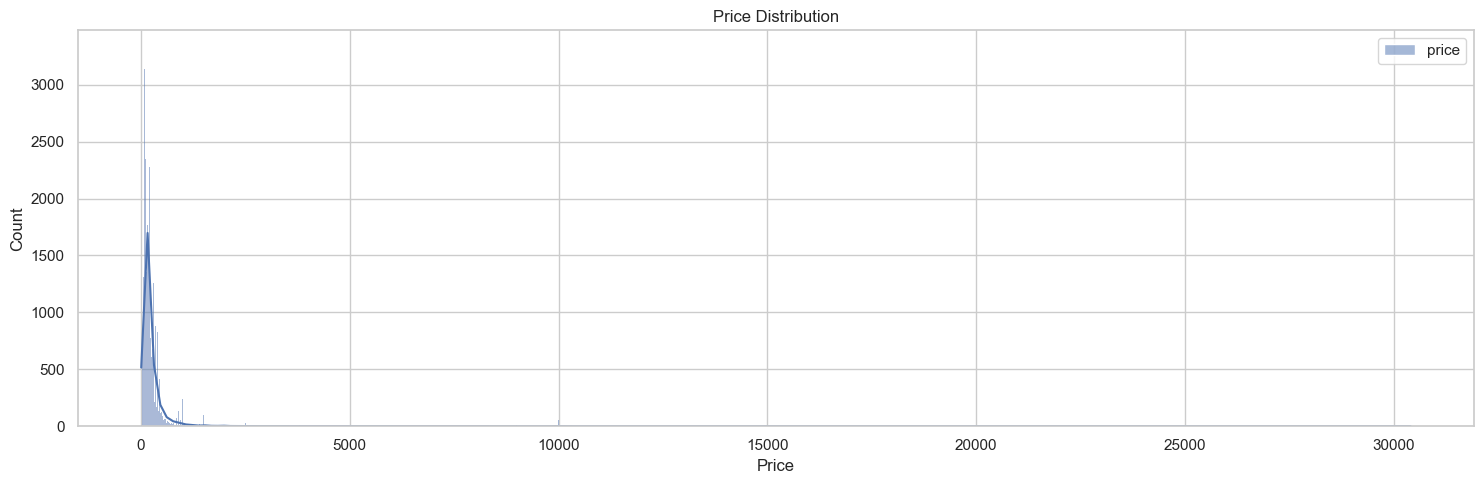

In [60]:
# Reimporting necessary libraries for data processing and plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Creating subplots for histograms/density plots of key numerical features
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Plotting the histogram for 'price'
sns.histplot(list_paris_price_df[feature_1], kde=True, ax=axes, color='blue')
axes.set_title('Price Distribution')
axes.set_xlabel('Price')

# Displaying the plots
plt.tight_layout()
plt.show()


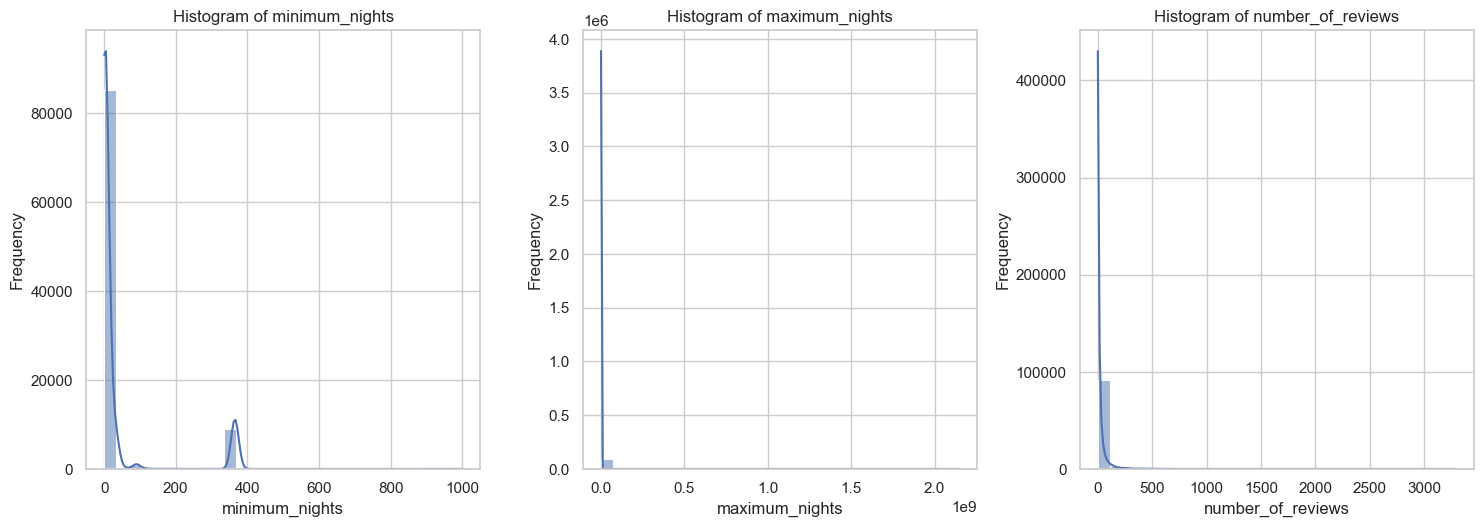

<Figure size 640x480 with 0 Axes>

In [28]:
# Reimporting necessary libraries for data processing and plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Creating subplots for histograms/density plots of key numerical features
plt.figure(figsize=(15, 10))
 
for i, feature in enumerate(feature_2):
    plt.subplot(2, 3, i+1)
    sns.histplot(list_paris_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
 
plt.tight_layout()
plt.show()

# Displaying the plots
plt.tight_layout()
plt.show()

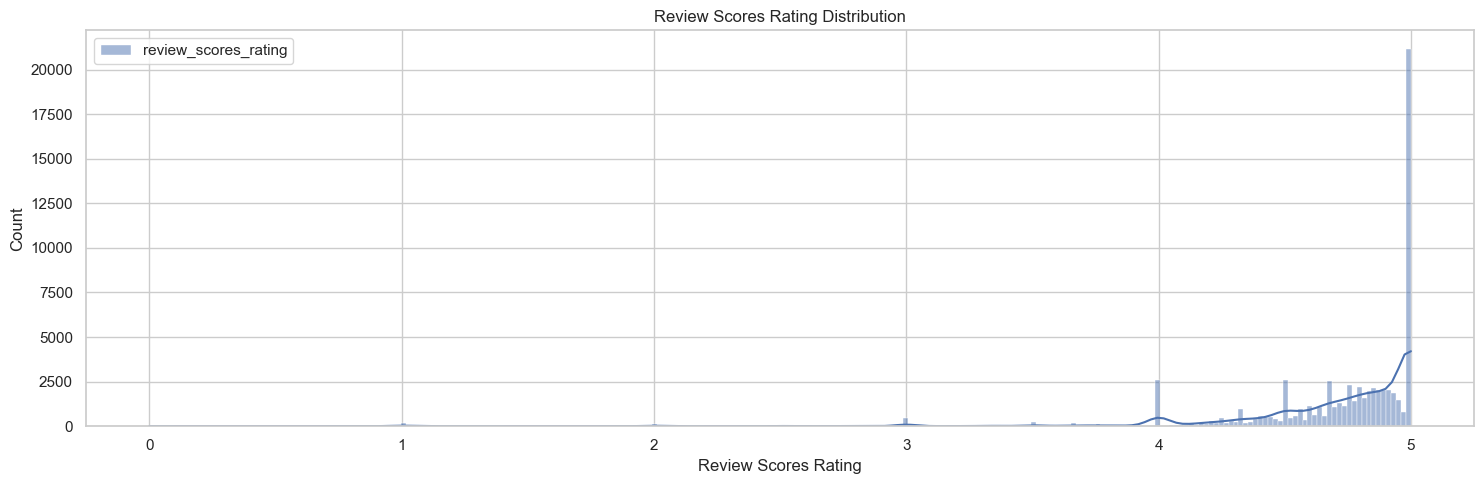

In [59]:
# Reimporting necessary libraries for data processing and plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Creating subplots for histograms/density plots of key numerical features
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Plotting the histogram for 'review_scores_rating'
sns.histplot(list_paris_review_scores_rating_df[feature_3].dropna(), kde=True, ax=axes, color='red')
axes.set_title('Review Scores Rating Distribution')
axes.set_xlabel('Review Scores Rating')

# Displaying the plots
plt.tight_layout()
plt.show()

# Binning price listing to remove outliers in data

In [46]:
price_bins = [0,103,155,256,500,1000,5000,7500,10000,30400]
 
list_paris_price_df['binned_price'] = pd.cut(list_paris_price_df['price'],price_bins)
 
price_bins_count = list_paris_price_df['binned_price'].value_counts()
 
print(price_bins_count)

binned_price
(0, 103]          16210
(155, 256]        16066
(103, 155]        15933
(256, 500]        11059
(500, 1000]        3589
(1000, 5000]       1243
(7500, 10000]        77
(5000, 7500]         38
(10000, 30400]       12
Name: count, dtype: int64


# Removing the data from 10000

In [65]:
binned_listing_paris_df = list_paris_price_df[list_paris_price_df['price'] < 1000]
 

In [62]:
binned_summary_stats_1 = binned_listing_paris_df[feature_1].describe()
print(binned_summary_stats_1)

              price
count  64087.000000
mean     237.305787
std      293.716332
min        8.000000
25%      102.000000
50%      155.000000
75%      255.000000
max     4974.000000


# Varience for binned data

In [63]:
binned_variance_price= binned_listing_paris_df[feature_1].var()
 
# Interquartile Range (IQR)
Q1 = binned_listing_paris_df[feature_1].quantile(0.25)
Q3 = binned_listing_paris_df[feature_1].quantile(0.75)
IQR = Q3 - Q1
 
print("Variance:\n", binned_variance_price)
print("IQR:\n", IQR)

Variance:
 price    86269.283439
dtype: float64
IQR:
 price    153.0
dtype: float64


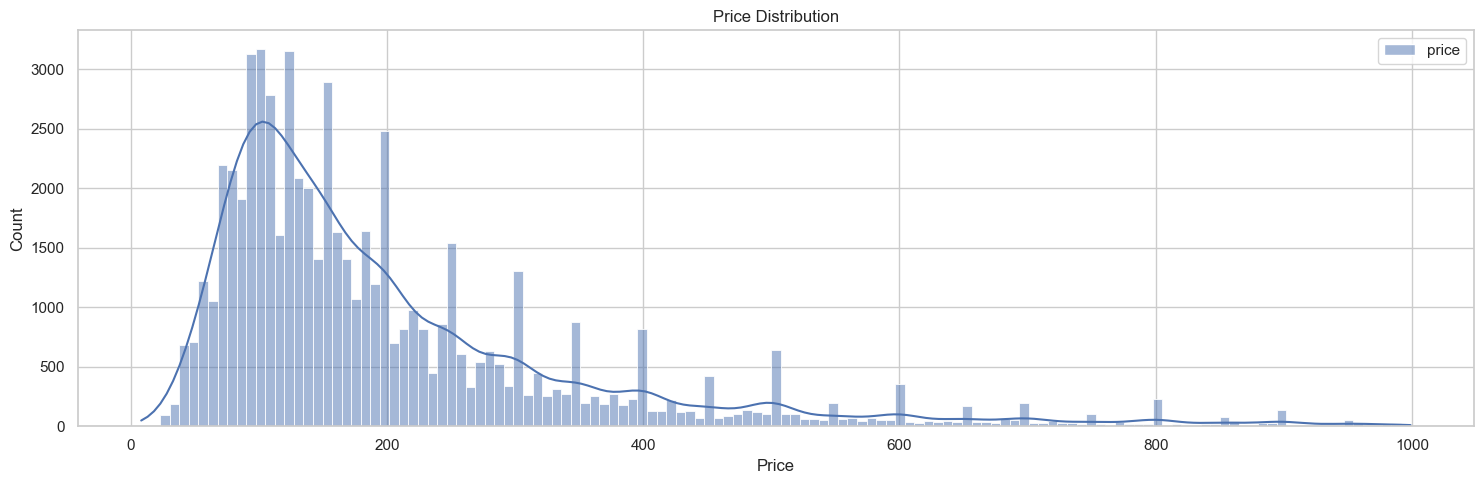

In [66]:

sns.set(style="whitegrid")

# Creating subplots for histograms/density plots of key numerical features
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Plotting the histogram for 'price'
sns.histplot(binned_listing_paris_df[feature_1], kde=True, ax=axes, color='blue')
axes.set_title('Price Distribution')
axes.set_xlabel('Price')

# Displaying the plots
plt.tight_layout()
plt.show()

/var/folders/43/6fvj434j2qjfvdnjgd1n535r0000gn/T/ipykernel_27896/2816887790.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(binned_listing_paris_df['price'], shade=True, color='blue')


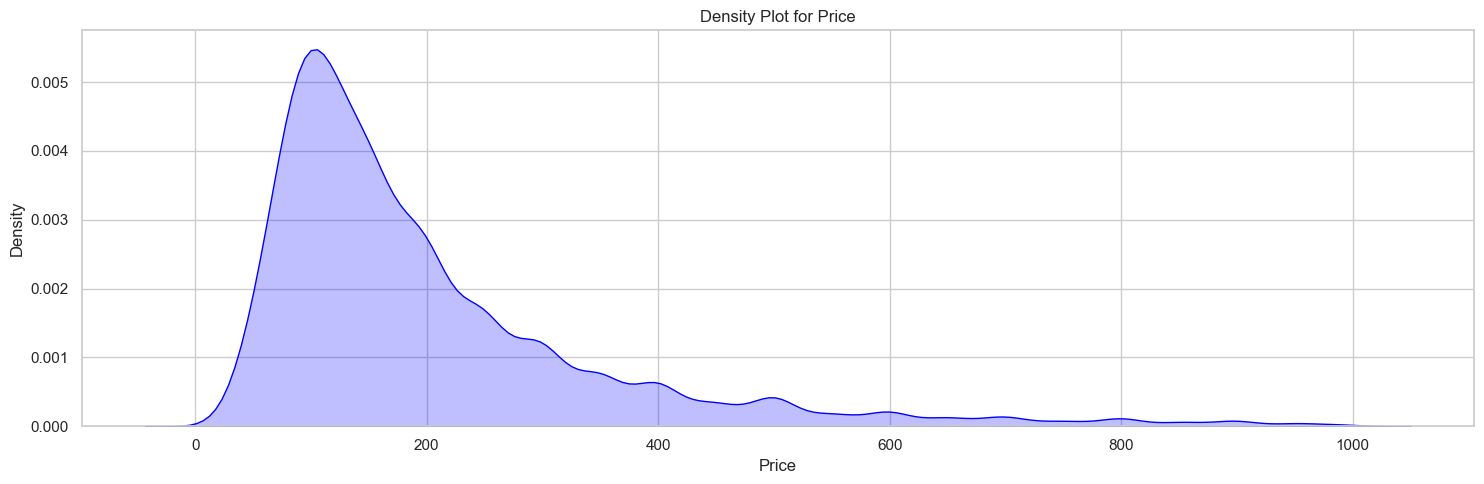

In [67]:
 
# Set up the figure size for better visualization
plt.figure(figsize=(15, 5))
 
# Plot KDE for 'price'
plt.subplot(1, 1, 1)  # 1 rows, 1 column, 1st plot
sns.kdeplot(binned_listing_paris_df['price'], shade=True, color='blue')
plt.title('Density Plot for Price')
plt.xlabel('Price')
 
# Adjust the spacing between plots
plt.tight_layout()
 
# Show the plots
plt.show()
 

# Binning for min/max nights and reviews

In [74]:
min_bins = [0,2,3,5,10,15,1000]
max_bins = [0,100,500,1000,5000,10000,50000,100000]

list_paris_df['binned_min'] = pd.cut(list_paris_df['minimum_nights'],min_bins)
list_paris_df['binned_max'] = pd.cut(list_paris_df['maximum_nights'],max_bins)

 
min_bins_count = list_paris_df['binned_min'].value_counts()
max_bins_count = list_paris_df['binned_max'].value_counts()

 
print(min_bins_count)
print(max_bins_count)

binned_min
(0, 2]        43322
(2, 3]        17885
(15, 1000]    17369
(3, 5]        11624
(5, 10]        4701
(10, 15]        558
Name: count, dtype: int64
binned_max
(100, 500]         36006
(0, 100]           29224
(1000, 5000]       29063
(500, 1000]         1164
(5000, 10000]          0
(10000, 50000]         0
(50000, 100000]        0
Name: count, dtype: int64


In [85]:
min_max_nights_bins_df = list_paris_df[list_paris_df['minimum_nights'] < 10]
min_max_nights_bins_df = min_max_nights_bins_df[min_max_nights_bins_df['maximum_nights'] < 5000]

In [86]:
min_bins = min_max_nights_bins_df['minimum_nights'].describe()
max_bins = min_max_nights_bins_df['maximum_nights'].describe()
print(min_bins)
print(max_bins)

count    77080.000000
mean         2.558861
std          1.545653
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: minimum_nights, dtype: float64
count    77080.000000
mean       410.690996
std        416.919666
min          0.000000
25%         30.000000
50%        365.000000
75%        365.000000
max       1126.000000
Name: maximum_nights, dtype: float64


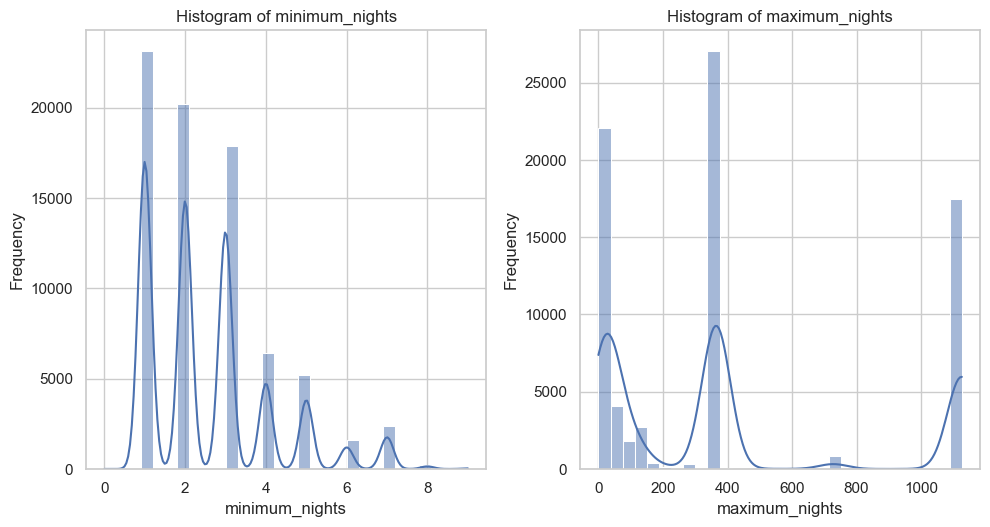

<Figure size 640x480 with 0 Axes>

In [87]:
sns.set(style="whitegrid")

feature_4 = ['minimum_nights','maximum_nights']

# Creating subplots for histograms/density plots of key numerical features
plt.figure(figsize=(15, 10))
 
for i, feature in enumerate(feature_4):
    plt.subplot(2, 3, i+1)
    sns.histplot(min_max_nights_bins_df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
 
plt.tight_layout()
plt.show()

# Displaying the plots
plt.tight_layout()
plt.show()

# Task 3

                         price  availability_365  number_of_reviews  \
price                 1.000000          0.099259          -0.053284   
availability_365      0.099259          1.000000           0.020524   
number_of_reviews    -0.053284          0.020524           1.000000   
review_scores_rating  0.116822         -0.085990           0.021514   

                      review_scores_rating  
price                             0.116822  
availability_365                 -0.085990  
number_of_reviews                 0.021514  
review_scores_rating              1.000000  


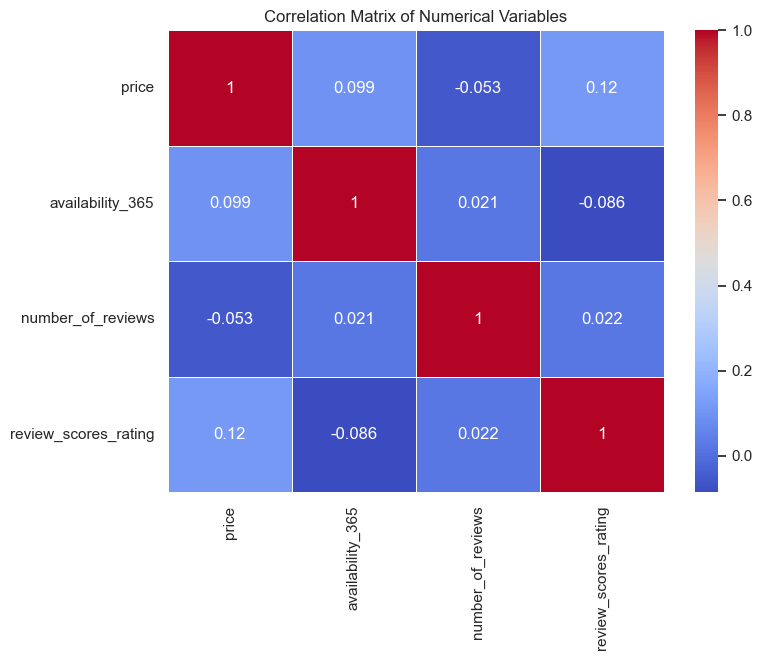

In [90]:
features = ['price','availability_365','number_of_reviews','review_scores_rating']
 
corr_matrix = binned_listing_paris_df[features].corr()
 
# Print the correlation matrix
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
 
# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

                         price  availability_365  number_of_reviews  \
price                 1.000000          0.099259          -0.053284   
availability_365      0.099259          1.000000           0.020524   
number_of_reviews    -0.053284          0.020524           1.000000   
review_scores_rating  0.116822         -0.085990           0.021514   
bedrooms              0.486766          0.021313          -0.031305   
bathrooms             0.409227          0.039938           0.006968   
accommodates          0.492316          0.062917           0.011026   

                      review_scores_rating  bedrooms  bathrooms  accommodates  
price                             0.116822  0.486766   0.409227      0.492316  
availability_365                 -0.085990  0.021313   0.039938      0.062917  
number_of_reviews                 0.021514 -0.031305   0.006968      0.011026  
review_scores_rating              1.000000  0.059331   0.036804     -0.006871  
bedrooms                       

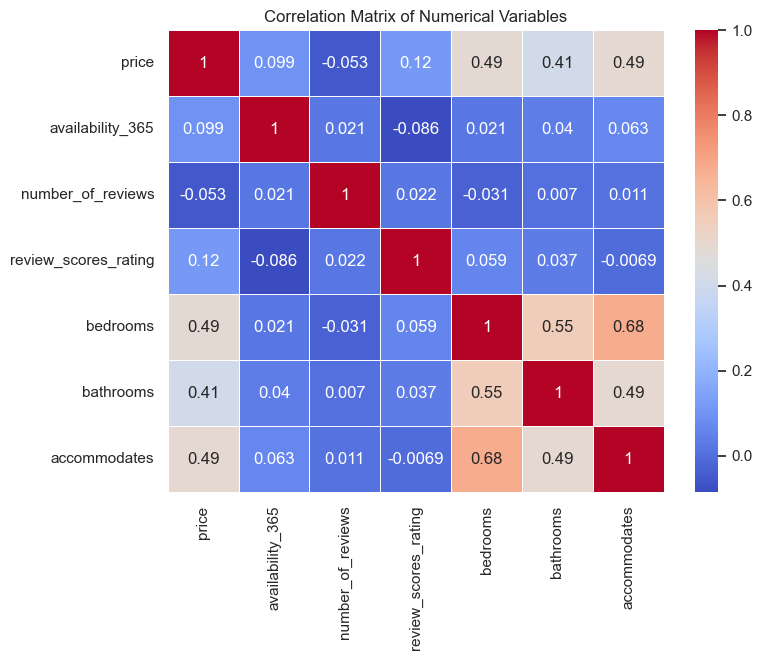

In [91]:
features = ['price','availability_365','number_of_reviews','review_scores_rating','bedrooms','bathrooms','accommodates']
 
corr_matrix = binned_listing_paris_df[features].corr()
 
# Print the correlation matrix
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
 
# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Task 7

In [ ]:
review_amsterdam_df['comment_length'] = review_amsterdam_df['comments'].str.len()
 
columns = ['comments','comment_length']
 
print(review_amsterdam_df.info())
 
# Display the DataFrame with the new column
print(review_amsterdam_df[columns])